
## Открытый курс по машинному обучению
Автор материала: программист-исследователь Mail.ru Group, старший преподаватель Факультета Компьютерных Наук ВШЭ Юрий Кашницкий. Материал распространяется на условиях лицензии [Creative Commons CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/). Можно использовать в любых целях (редактировать, поправлять и брать за основу), кроме коммерческих, но с обязательным упоминанием автора материала.

# <center>Домашнее задание. <br> Анализ данных по доходу населения UCI Adult</center>

**В задании предлагается с помощью Pandas ответить на несколько вопросов по данным репозитория UCI [Adult](https://archive.ics.uci.edu/ml/datasets/Adult) (качать данные не надо – они уже есть в репозитории). Для отправки решений используйте [онлайн-форму](https://goo.gl/forms/pB1tDIArMvTUsIUg2).**

Уникальные значения признаков (больше информации по ссылке выше):
- age: continuous.
- workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
- fnlwgt: continuous.
- education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
- education-num: continuous.
- marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
- occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
- relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
- race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
- sex: Female, Male.
- capital-gain: continuous.
- capital-loss: continuous.
- hours-per-week: continuous.
- native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.   
- salary: >50K,<=50K

In [1]:
import pandas as pd
# чтоб картинки рисовались в тетрадке
%matplotlib inline 
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (10, 8)

In [2]:
data = pd.read_csv('adult.data.csv')
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


**1. Сколько мужчин и женщин (признак *sex*) представлено в этом наборе данных?**

In [3]:
data['sex'].value_counts()

Male      21790
Female    10771
Name: sex, dtype: int64

**2. Каков средний возраст (признак *age*) женщин?**

In [4]:
data[data['sex'] == 'Female']['age'].mean()

36.85823043357163

**3. Какова доля граждан Германии (признак *native-country*)?**

In [19]:
data['native-country'].value_counts(normalize = True).filter(like = 'Germany')


Germany    0.004207
Name: native-country, dtype: float64

**4. Постройте гистограмму распределения (*bar plot*) образования людей (признак *education*).**

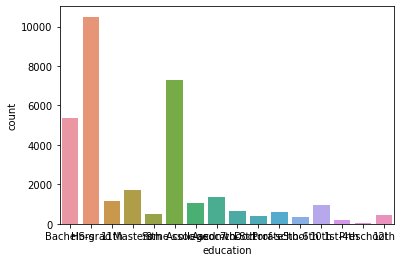

In [28]:
sns.countplot(x='education', data=data)

**5. Каковы средние значения и среднеквадратичные отклонения возраста тех, кто получает более 50K в год (признак *salary*) и тех, кто получает менее 50K в год? **

In [40]:
{'mean <=50': data[data['salary'] == '<=50K']['age'].mean(), 'std <=50': data[data['salary'] == '<=50K']['age'].std(), 'mean >50': data[data['salary'] == '>50K']['age'].mean(), 'std >50': data[data['salary'] == '>50K']['age'].std()}

{'mean <=50': 36.78373786407767,
 'std <=50': 14.020088490824813,
 'mean >50': 44.24984058155847,
 'std >50': 10.51902771985177}

**6. Правда ли, что люди, которые получают больше 50k, имеют как минимум высшее образование? (признак *education - Bachelors, Prof-school, Assoc-acdm, Assoc-voc, Masters* или *Doctorate*)**

In [75]:
d = {'Bachelors' : 'High', 'Doctorate' : 'High', 'Assoc-voc' : 'High', 'Masters' : 'High', 'Assoc-acdm' : 'High', 'Prof-school' : 'High'}
data_edit = pd.read_csv('adult.data.csv')
data_edit['education'] = data_edit['education'].map(d)
data_edit[(data_edit['salary'] == '>50K') & (data_edit['education'] != 'High')]['salary'].value_counts().mean() == 0

False

**7. Выведите статистику возраста для каждой расы (признак *race*) и каждого пола. Используйте *groupby* и *describe*. Найдите таким образом максимальный возраст мужчин расы *Amer-Indian-Eskimo*.**

In [79]:
data.groupby(['race'])['age'].describe()

,count,mean,std,min,25%,50%,75%,max
race,,,,,,,,
Amer-Indian-Eskimo,311.0,37.173633,12.447130,17.0,28.0,35.0,45.5,82.0
Asian-Pac-Islander,1039.0,37.746872,12.825133,17.0,28.0,36.0,45.0,90.0
Black,3124.0,37.767926,12.759290,17.0,28.0,36.0,46.0,90.0
Other,271.0,33.457565,11.538865,17.0,25.0,31.0,41.0,77.0
White,27816.0,38.769881,13.782306,17.0,28.0,37.0,48.0,90.0


**8. Среди кого больше доля зарабатывающих много (>50K): среди женатых или холостых мужчин (признак *marital-status*)? Женатыми считаем тех, у кого *marital-status* начинается с *Married* (Married-civ-spouse, Married-spouse-absent или Married-AF-spouse), остальных считаем холостыми.**

In [87]:
if (data[data['salary'] == '>50K']['marital-status'].value_counts().filter(like='Married').sum() / data[data['salary'] == '>50K']['marital-status'].value_counts().sum()) > 0.5:
        print('Married')
else:
    print('Not married')

Married


**9. Какое максимальное число часов человек работает в неделю (признак *hours-per-week*)? Сколько людей работают такое количество часов и каков среди них процент зарабатывающих много?**

In [100]:
print(data['hours-per-week'].max())
print(len(data[data['hours-per-week'] == data['hours-per-week'].max()]))
len(data[(data['hours-per-week'] == data['hours-per-week'].max()) & (data['salary'] == '>50K')]) / len(data[data['hours-per-week'] == data['hours-per-week'].max()])

99
85


0.29411764705882354

**10. Посчитайте среднее время работы (*hours-per-week*) зарабатывающих мало и много (*salary*) для каждой страны (*native-country*).**

In [102]:
data.groupby(['salary', 'native-country'])['hours-per-week'].mean()

salary  native-country            
<=50K   ?                             40.164760
        Cambodia                      41.416667
        Canada                        37.914634
        China                         37.381818
        Columbia                      38.684211
        Cuba                          37.985714
        Dominican-Republic            42.338235
        Ecuador                       38.041667
        El-Salvador                   36.030928
        England                       40.483333
        France                        41.058824
        Germany                       39.139785
        Greece                        41.809524
        Guatemala                     39.360656
        Haiti                         36.325000
        Holand-Netherlands            40.000000
        Honduras                      34.333333
        Hong                          39.142857
        Hungary                       31.300000
        India                         38.233333
     